## Kaggle Humpback Whale Identification - Whale ID Data exploration

From the competition site: "This training data contains thousands of images of humpback whale flukes. Individual whales have been identified by researchers and given an Id. The challenge is to predict the whale Id of images in the test set. What makes this such a challenge is that there are only a few examples for each of 3,000+ whale Ids."

#### train.zip - a folder containing the training images

#### train.csv - maps the training images (from train.zip) to their whale ID. Whales that are not predicted to have a label identified in the training data are labeled as 'new_whale'.

Code in this notebook explores the train.csv data to determine the distribution of images per whale.


In [1]:
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [4]:
train.shape

(25361, 2)

In [5]:
# unique IDs
len(train['Id'].unique().tolist())

5005

In [6]:
# counting the number of occurrences of each ID (top 5 counts displayed)
train['Id'].value_counts()[:5]

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
Name: Id, dtype: int64

In [7]:
temp_df = train.groupby('Id').count()

In [8]:
temp_df[temp_df.Image == 1].head()

,Image
Id,
w_0003639,1
w_0003c59,1
w_002c810,1
w_0032a46,1
w_0066399,1


In [9]:
temp_df_subset = temp_df[temp_df.Image == 1]

In [10]:
# counting whales that have just one image
temp_df_subset.shape

(2073, 1)

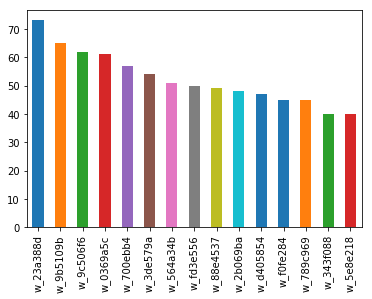

In [11]:
train['Id'].value_counts()[1:16].plot(kind='bar')

#### Distribution of images per whale is highly skewed.

2000+ whales have just one image

Single whale (ID=w_23a388d) with most images has 73 images

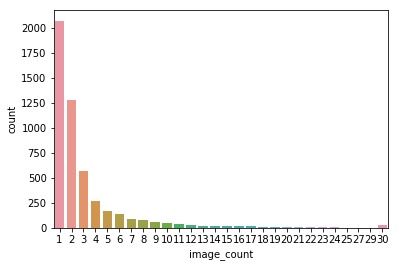

In [12]:
counted = train.groupby("Id").count().rename(columns={"Image":"image_count"})
counted.loc[counted["image_count"] > 30,'image_count'] = 30
plt.figure()
sns.countplot(data=counted, x="image_count")
plt.show()

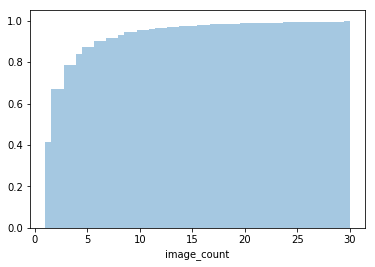

In [13]:
# histogram showing density of image counts
sns.distplot(counted["image_count"], norm_hist=True, kde=False, hist_kws={'cumulative': True})

#### Images dsitribution:
    
41.4% (2073) of the total unique IDs comes from 'new_whale' group

almost 30% (29.33%) come from whales with 4 or less images

the rest of 30%, comes from whales with 5-73 images

In [14]:
image_count_for_whale = train.groupby("Id", as_index=False).count().rename(columns={"Image":"image_count"})
whale_count_for_image_count = image_count_for_whale.groupby("image_count", as_index=False).count().rename(columns={"Id":"whale_count"})
whale_count_for_image_count['image_total_count'] = whale_count_for_image_count['image_count'] * whale_count_for_image_count['whale_count']
whale_count_for_image_count['total_count_cumm_%'] = round((whale_count_for_image_count["image_total_count"].cumsum() / len(train))*100, 2)

In [15]:
whale_count_for_image_count[:5]

,image_count,whale_count,image_total_count,total_count_cumm_%
0,1,2073,2073,8.17
1,2,1285,2570,18.31
2,3,568,1704,25.03
3,4,273,1092,29.33
4,5,172,860,32.72


In [16]:
whale_count_for_image_count[-5:]

,image_count,whale_count,image_total_count,total_count_cumm_%
44,61,1,61,61.11
45,62,1,62,61.35
46,65,1,65,61.61
47,73,1,73,61.89
48,9664,1,9664,100.00


In [17]:
pd.DataFrame(train.Id.value_counts().describe([0.25, 0.40, 0.75, 0.8, 0.9, 0.95, 0.99, 0.999])).T

,count,mean,std,min,25%,40%,50%,75%,80%,90%,95%,99%,99.9%,max
Id,5005.0,5.067133,136.634756,1.0,1.0,1.0,2.0,3.0,4.0,6.0,10.0,22.0,56.988,9664.0


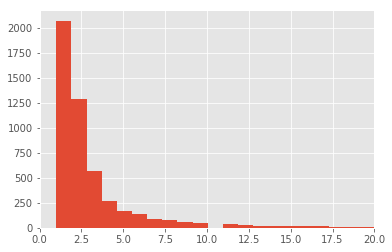

In [18]:
plt.style.use('ggplot')
_id_counts = train.Id.value_counts()
_id_counts[_id_counts <= 20].hist(bins=21)
_ = plt.xlim(0, 20)